In [8]:
%matplotlib inline

import utils
from utils import *

from __future__ import division, print_function
import os, json
from glob import glob

from matplotlib import pyplot as plt

import scipy
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import numpy as np
from numpy.random import random, permutation

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

np.set_printoptions(precision=4, linewidth=100)

def onehot(x):
    return np.array( OneHotEncoder().fit_transform(x.reshape(-1, 1)).todense() )

In [2]:
path='data/dogscats/sample/'
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [3]:
batch_size = 4

In [4]:
from vgg16 import Vgg16

In [5]:
vgg = Vgg16()

In [6]:
model = vgg.model

In [9]:
validation_batches = get_batches(path+'valid', shuffle=False, batch_size=1)

Found 20 images belonging to 2 classes.


In [10]:
training_batches = get_batches(path+'train', shuffle=True, batch_size=1)

Found 42 images belonging to 2 classes.


In [11]:
validation_data = get_data(path+'valid')
training_data = get_data(path+'train')

Found 20 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [13]:
training_data.shape

(42, 3, 224, 224)

In [14]:
validation_data.shape

(20, 3, 224, 224)

In [15]:
validation_classes = validation_batches.classes

In [17]:
validation_classes.shape

(20,)

In [18]:
validation_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
training_classes = training_batches.classes

In [20]:
training_classes.shape

(42,)

In [21]:
training_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [23]:
training_labels = onehot(training_classes)
validation_labels = onehot(validation_classes)

In [24]:
training_labels

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [26]:
training_features = model.predict(training_data, batch_size=batch_size)

In [27]:
training_features.shape

(42, 1000)

In [28]:
training_features

array([[  4.2062e-07,   1.5420e-03,   6.3156e-06, ...,   3.2240e-07,   3.9332e-05,   7.6541e-02],
       [  2.1053e-06,   5.4372e-06,   1.6826e-06, ...,   5.9714e-07,   4.3381e-05,   3.7111e-04],
       [  9.0093e-07,   1.0360e-05,   3.8705e-07, ...,   1.5642e-06,   2.9683e-04,   6.4368e-05],
       ..., 
       [  5.4339e-07,   9.7910e-07,   1.8040e-05, ...,   5.4417e-06,   3.0255e-04,   1.5638e-03],
       [  9.9519e-07,   5.5580e-08,   6.1949e-08, ...,   1.9242e-06,   2.2619e-06,   3.1496e-06],
       [  1.4643e-05,   2.2368e-05,   9.2444e-06, ...,   3.5566e-06,   2.1439e-04,   4.1448e-04]], dtype=float32)

In [30]:
validation_features = model.predict(validation_data, batch_size=batch_size)

In [31]:
linear_model = Sequential( [ Dense(2, activation='softmax', input_shape=(1000,)) ] )

In [32]:
linear_model.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
batch_size = 4

In [34]:
linear_model.fit(training_features, training_labels, nb_epoch=3, batch_size=batch_size, validation_data=(validation_features, validation_labels))

Train on 42 samples, validate on 20 samples
Epoch 1/3
42/42 [==============================] - 0s - loss: 0.4617 - acc: 0.7619 - val_loss: 0.3110 - val_acc: 0.9000
Epoch 2/3
42/42 [==============================] - 0s - loss: 0.2248 - acc: 0.9762 - val_loss: 0.2369 - val_acc: 0.9000
Epoch 3/3
42/42 [==============================] - 0s - loss: 0.1404 - acc: 0.9762 - val_loss: 0.1906 - val_acc: 0.9500


In [35]:
predicted_classes = linear_model.predict_classes(validation_features, batch_size=batch_size)

 4/20 [=====>........................] - ETA: 0s

In [36]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
validation_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [38]:
predicted_probabilities = linear_model.predict_proba(validation_features, batch_size=batch_size)

 4/20 [=====>........................] - ETA: 0s

In [39]:
predicted_probabilities

array([[ 0.9402,  0.0598],
       [ 0.9621,  0.0379],
       [ 0.6896,  0.3104],
       [ 0.9515,  0.0485],
       [ 0.8658,  0.1342],
       [ 0.5149,  0.4851],
       [ 0.9614,  0.0386],
       [ 0.938 ,  0.062 ],
       [ 0.6617,  0.3383],
       [ 0.9754,  0.0246],
       [ 0.1162,  0.8838],
       [ 0.5103,  0.4897],
       [ 0.0778,  0.9222],
       [ 0.0191,  0.9809],
       [ 0.0827,  0.9173],
       [ 0.0348,  0.9652],
       [ 0.0868,  0.9132],
       [ 0.4227,  0.5773],
       [ 0.0691,  0.9309],
       [ 0.1565,  0.8435]], dtype=float32)

In [40]:
filenames = validation_batches.filenames

In [41]:
n_view = 5

In [42]:
def plot_idx(idx, titles=None):
    plots([ image.load_img(path+'valid/'+filenames[i]) for i in idx ], titles=titles)

In [44]:
correct = np.where(predicted_classes == validation_labels[:, 1])[0]

In [45]:
idx = permutation(correct)[:n_view]

In [46]:
correct

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19])

In [47]:
idx

array([ 1,  5, 15,  7,  9])

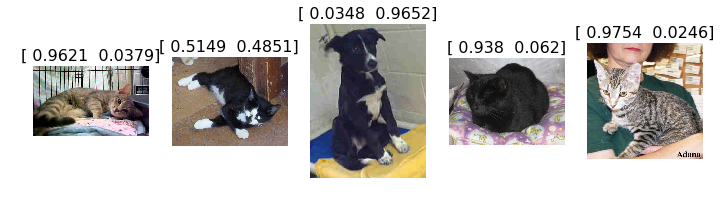

In [48]:
plot_idx(idx, predicted_probabilities[idx])

In [50]:
incorrect = np.where(predicted_classes != validation_labels[:,1])[0]

In [51]:
idx = permutation(incorrect)[:n_view]

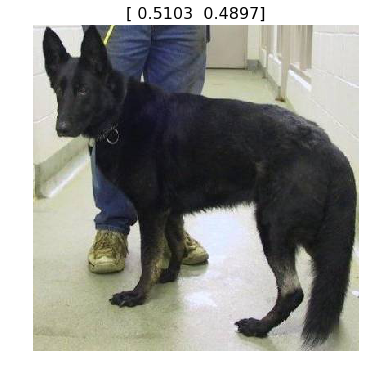

In [52]:
plot_idx(idx, predicted_probabilities[idx])